# Lecture 1: Code demo

In [1]:
suppressPackageStartupMessages(library(tidyverse))
library(palmerpenguins)
library(infer)
library(modelr)

## Part I

### 0. Remove the NAs

In [2]:
penguins_clean <-
    penguins %>%
    drop_na()

cat("We lost", nrow(penguins) - nrow(penguins_clean), "rows by removing the NAs")

We lost 11 rows by removing the NAs

### 1. Start with scatterplot

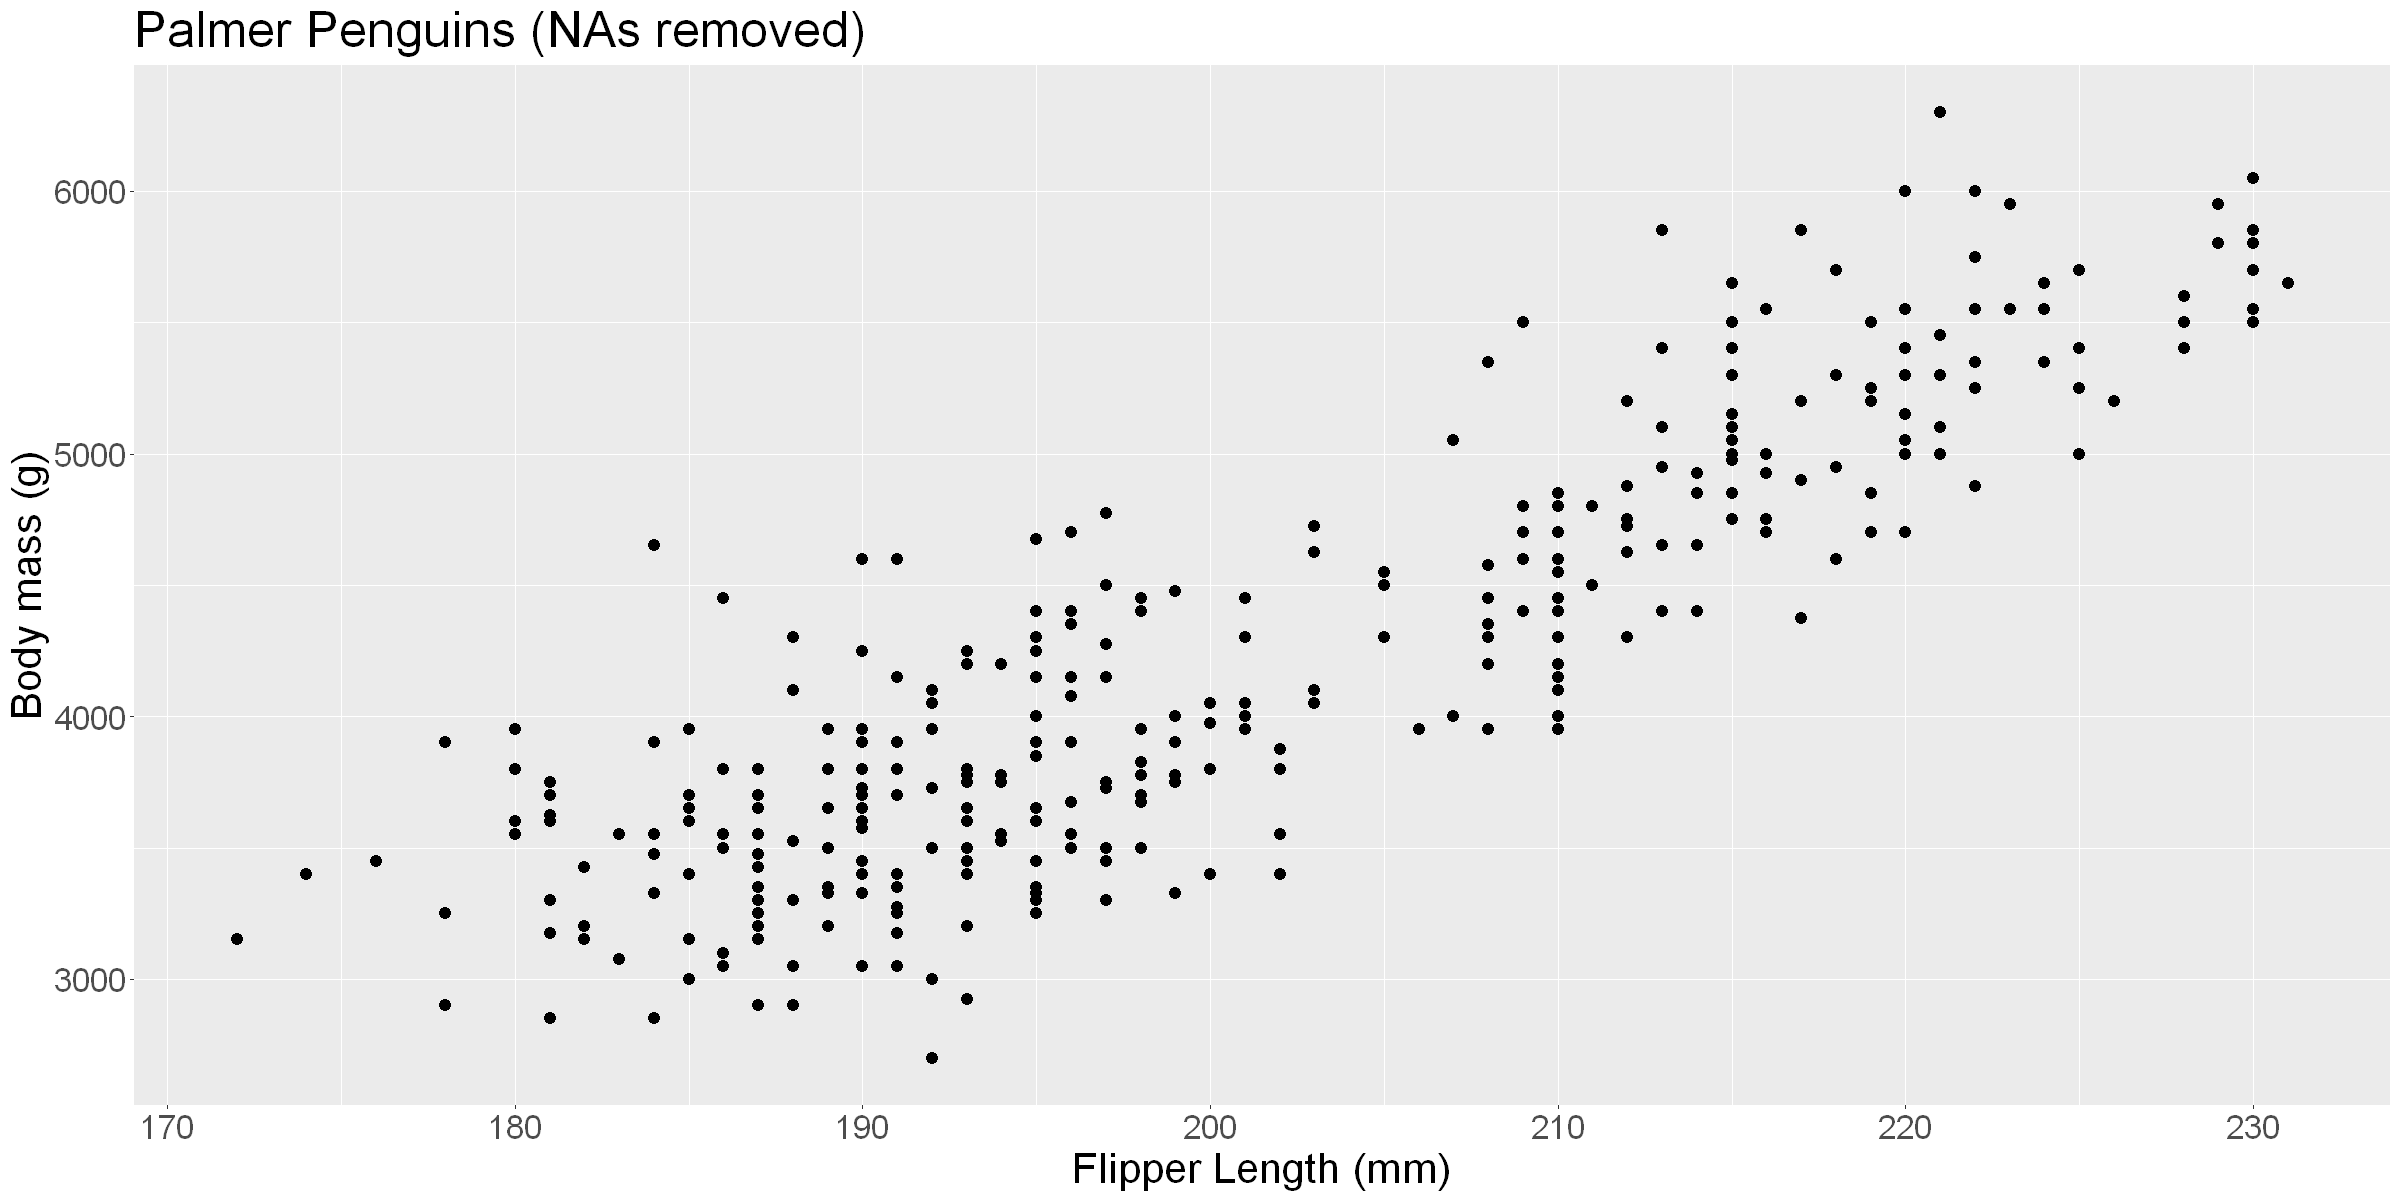

In [3]:
# Adjust these numbers so the plot looks good on your desktop.
options(repr.plot.width = 20, repr.plot.height = 10) 

penguins_clean %>% 
  ggplot(aes(flipper_length_mm, body_mass_g)) + 
  geom_point(size = 3) + 
  #geom_smooth(method = 'lm') + 
  ggtitle("Palmer Penguins (NAs removed)") + 
  xlab("Flipper Length (mm)") + 
  ylab("Body mass (g)") + 
  theme(text = element_text(size = 25))

### 2. Fit the `lm`

In [4]:
(penguins_lm <- lm(body_mass_g ~ flipper_length_mm, data = penguins_clean))


Call:
lm(formula = body_mass_g ~ flipper_length_mm, data = penguins_clean)

Coefficients:
      (Intercept)  flipper_length_mm  
         -5872.09              50.15  


#### 2.1 Extract coefficients

In [5]:
coef(penguins_lm)

(Intercept) flipper_length_mm 
      -5872.09268          50.15327

In [6]:
penguins_lm$coefficients

(Intercept) flipper_length_mm 
      -5872.09268          50.15327

#### 2.2 Make predictions

In [7]:
(penguins_clean <-
    penguins_clean %>%
    add_predictions(model = penguins_lm,
                    var = 'slr_pred'))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,slr_pred
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,3205.648
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,3456.415
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,3907.794
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,3807.488
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,3657.028
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,3205.648
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,3907.794
Adelie,Torgersen,41.1,17.6,182,3200,female,2007,3255.802
Adelie,Torgersen,38.6,21.2,191,3800,male,2007,3707.181


#### 2.3 `lm` with no intercept

If you add a 0 to your formula, you remove the intercept of the model.

We **do not** want to fit a model without an intercept, but this trick can be useful to us later (more on this next lecture). 

In [8]:
lm(body_mass_g ~ 0 + flipper_length_mm, data = penguins_clean)


Call:
lm(formula = body_mass_g ~ 0 + flipper_length_mm, data = penguins_clean)

Coefficients:
flipper_length_mm  
            21.08  


### 3. Write the equation

body_mass = $-5872 + 50.15\times$ flipper_length

#### 3.1 Interpret the parameter

- **Slope:** A $1 mm$ increase in flipper length is associated with a $50.15g$ weight gain.
- **Intercept:** A penguin with a flipper length of $0 cm$ is expected to weigh $-5872g$. (<font style='color: red'>**meaningless in this case**</font>)

### 4. Show plot

#### 4.1 `geom_smooth`

`geom_smooth()` using formula = 'y ~ x'


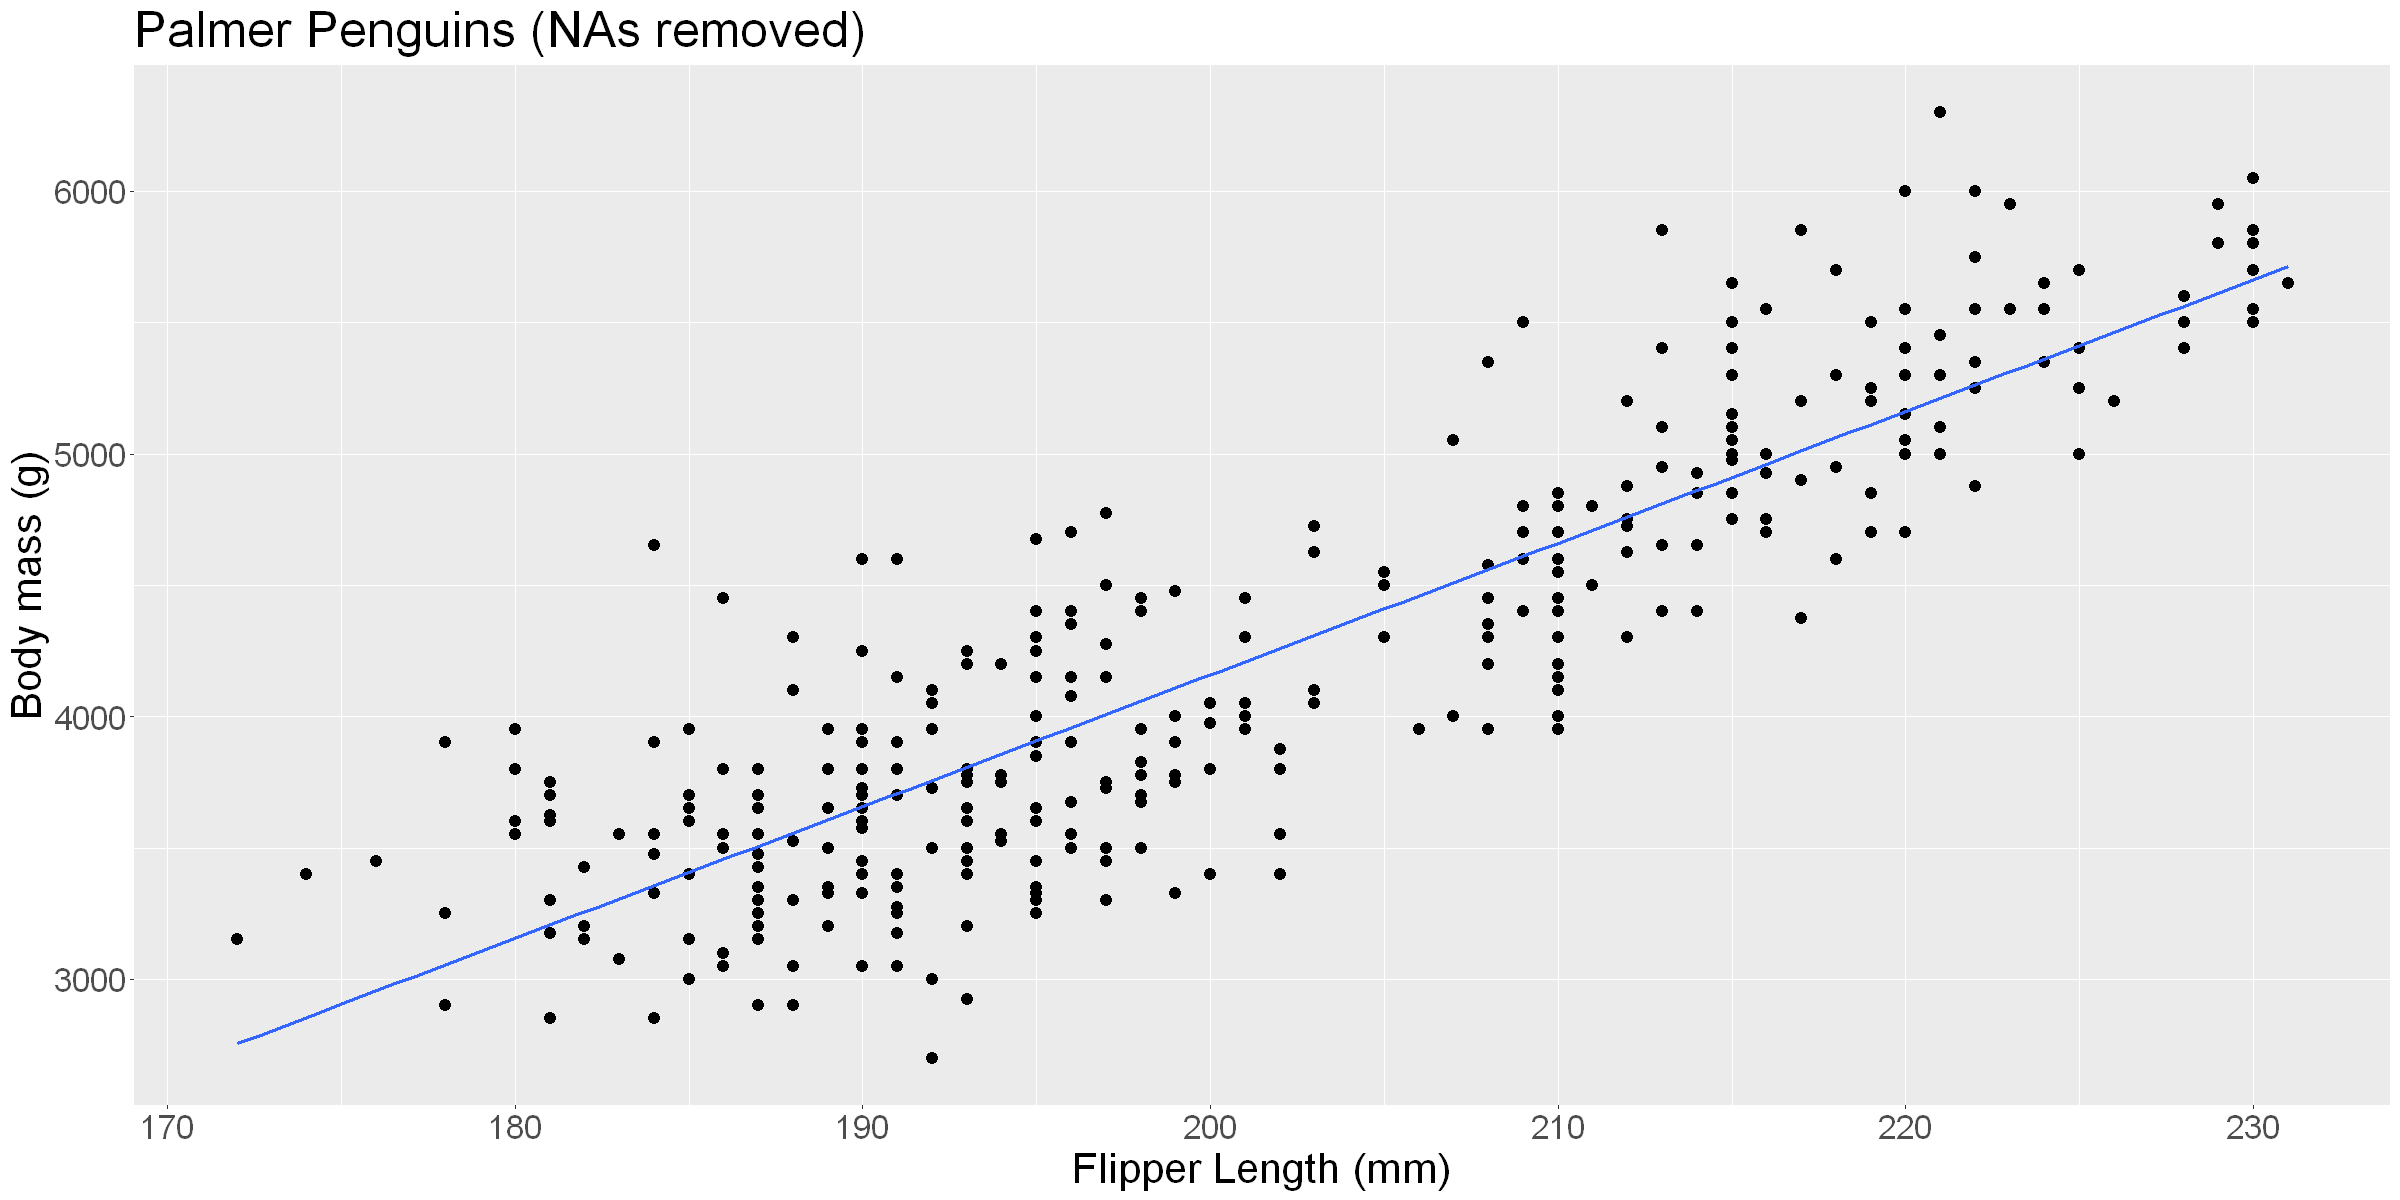

In [9]:
# Adjust these numbers so the plot looks good on your desktop.
options(repr.plot.width = 20, repr.plot.height = 10) 

penguins_clean %>% 
  ggplot(aes(flipper_length_mm, body_mass_g)) + 
  geom_point(size = 3) + 
  geom_smooth(method = 'lm', se = FALSE) + 
  ggtitle("Palmer Penguins (NAs removed)") + 
  xlab("Flipper Length (mm)") + 
  ylab("Body mass (g)") + 
  theme(text = element_text(size = 25))

#### 4.2 Using the predictions

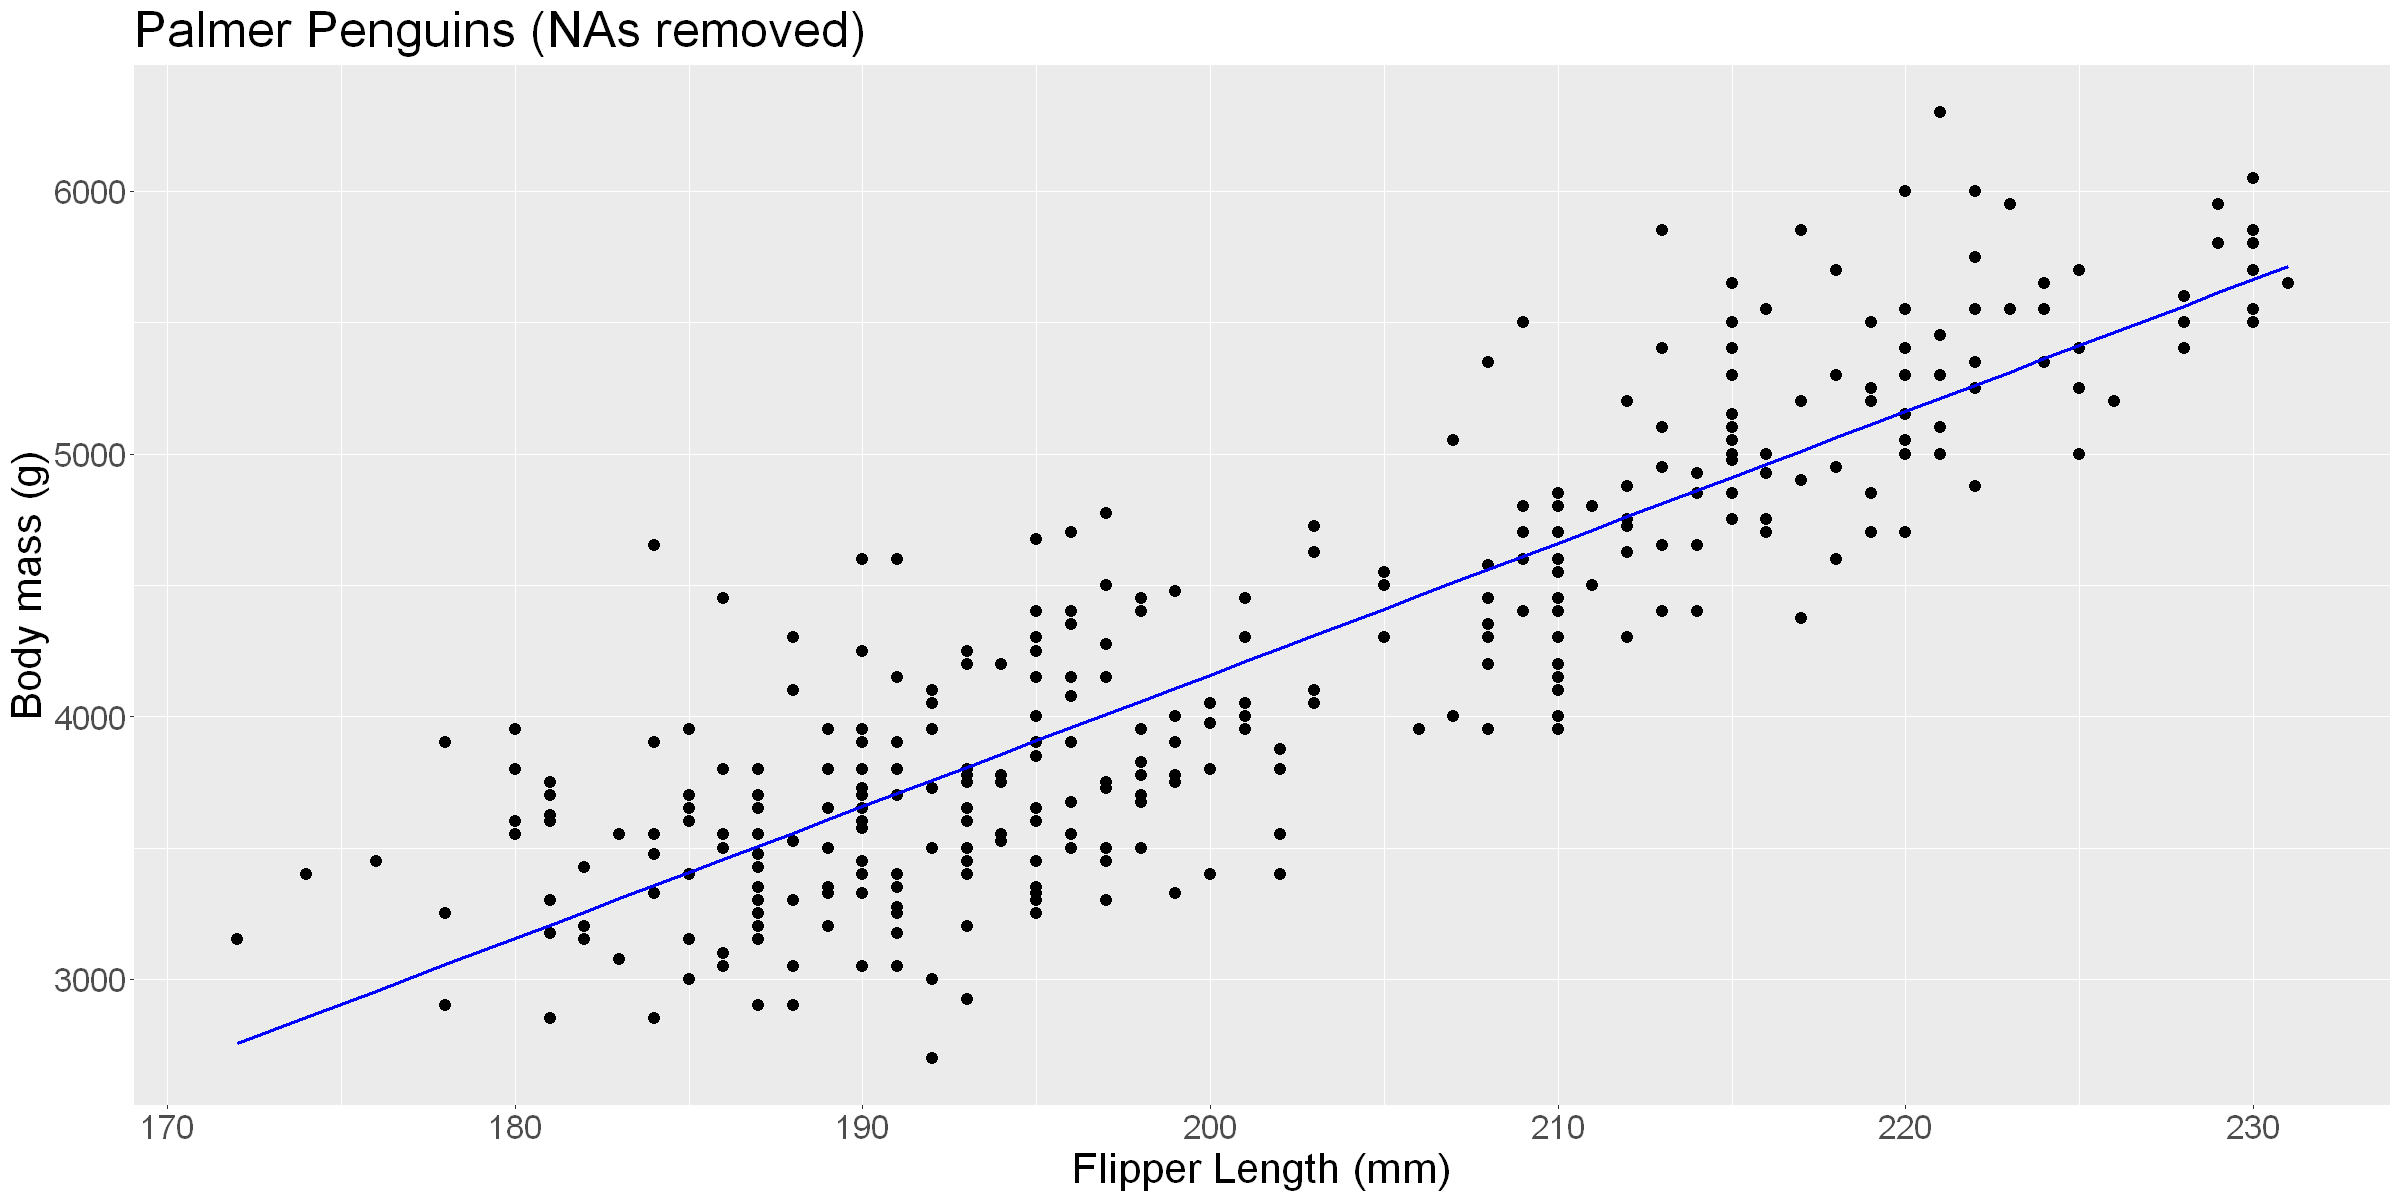

In [10]:
# Adjust these numbers so the plot looks good on your desktop.
options(repr.plot.width = 20, repr.plot.height = 10) 

penguins_clean %>% 
  ggplot(aes(flipper_length_mm, body_mass_g)) + 
  geom_point(size = 3) + 
  geom_line(aes(y = slr_pred), color = 'blue', lwd = 1) + 
  ggtitle("Palmer Penguins (NAs removed)") + 
  xlab("Flipper Length (mm)") + 
  ylab("Body mass (g)") + 
  theme(text = element_text(size = 25))

## Part II - Confidence Interval

### 5. Mathematical Approach

#### 5.1 Manual Calculation

Let's first calculate it by hand. Of course you won't need to to this, but it might help you understand what R is doing. 

In [11]:
# Number of data points
n <- nrow(penguins_clean)

# Estimate σ  
s <- sqrt(sum(penguins_lm$residuals**2)/ (n - 2)) 
s

[1] 393.3433

##### The case of $\beta_0$

In [12]:
# Std. Error of beta0 estimator.
s_beta0_hat <- sqrt(s**2 * (1/n + mean(penguins_clean$flipper_length_mm)**2 / sum( (penguins_clean$flipper_length_mm - mean(penguins_clean$flipper_length_mm))** 2)))

# Confidence Interval for Beta0
tibble(
    ci_lower = coef(penguins_lm)[1] - qt(0.975, nrow(penguins_clean)-2) * s_beta0_hat,
    ci_upper = coef(penguins_lm)[1] + qt(0.975, nrow(penguins_clean)-2) * s_beta0_hat
)

ci_lower,ci_upper
<dbl>,<dbl>
-6482.472,-5261.713


##### The case of $\beta_1$

In [13]:
# Std. Error of beta1 estimator.
s_beta1_hat <- sqrt( s**2 / sum( (penguins_clean$flipper_length_mm - mean(penguins_clean$flipper_length_mm))** 2))

# Confidence Interval for Beta1
tibble(
    ci_lower = coef(penguins_lm)[2] - qt(0.975, nrow(penguins_clean)-2) * s_beta1_hat,
    ci_upper = coef(penguins_lm)[2] + qt(0.975, nrow(penguins_clean)-2) * s_beta1_hat
)

ci_lower,ci_upper
<dbl>,<dbl>
47.12339,53.18314


#### 5.2 R does it for us!

You can use the `confint` function.

In [14]:
confint(penguins_lm, level = 0.95)[2,1]

[1] 47.12339

Or the `broom::tidy` function, which extracts everything for us! 

In [15]:
broom::tidy(penguins_lm, conf.int = TRUE, conf.level	= 0.95)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5872.09268,310.285155,-18.92483,1.183941e-54,-6482.47224,-5261.71313
flipper_length_mm,50.15327,1.540231,32.56217,3.132836e-105,47.12339,53.18314


### 6 Bootstrap approach

In [16]:
# Infer package framework

(ci_slope <-
  penguins_clean %>% 
  specify(formula = body_mass_g ~ flipper_length_mm) %>%
  generate(reps = 15000, type = "bootstrap") %>% 
  calculate(stat = "slope") %>% 
  get_ci(type = "percentile", level = 0.95))

lower_ci,upper_ci
<dbl>,<dbl>
47.2715,52.99971


## Part III - Hypothesis Test

### 7.1 Math-based approach

We can get the hypothesis test directly from R using the `summary` function

In [17]:
summary(penguins_lm)


Call:
lm(formula = body_mass_g ~ flipper_length_mm, data = penguins_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1057.33  -259.79   -12.24   242.97  1293.89 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5872.09     310.29  -18.93   <2e-16 ***
flipper_length_mm    50.15       1.54   32.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 393.3 on 331 degrees of freedom
Multiple R-squared:  0.7621,	Adjusted R-squared:  0.7614 
F-statistic:  1060 on 1 and 331 DF,  p-value: < 2.2e-16


or the `broom::tidy` function:

In [18]:
broom::tidy(penguins_lm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5872.09268,310.285155,-18.92483,1.183941e-54
flipper_length_mm,50.15327,1.540231,32.56217,3.132836e-105


### 7.2 Bootstrap 

In [19]:
# Infer package framework
beta1_hat <- coef(penguins_lm)[2]

penguins_clean %>%
    specify(body_mass_g ~ flipper_length_mm) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 15000, type = "permute") %>% 
    calculate(stat = "slope") %>%
    get_pvalue(obs_stat = beta1_hat, direction = 'both')

Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step.
ℹ See `get_p_value()` (`?infer::get_p_value()`) for more information."


p_value
<dbl>
0
